<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_11/blob/Updating-the-code/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def finite_diff(L, T, dx, dt, u, theta_init):
  '''
  The function takes input for space, time, intervals, velocity and
  initial concentration of pollution. Runs through the algorithm,
  modelling the change in concentration over time and space
  returning graphs
  '''

  # Calculates the number of discrete intervals
  Nx = int(round(L/dx, 2)) + 1
  Nt = int(round(T/dt, 2))

  x = np.linspace(0, L, Nx)


  # Construct arrays with placeholders for unknown concentrations
  new_conc = np.zeros(Nx)
  old_conc = np.zeros(Nx)

  # Construct arrays for matrix coefficients
  A = np.ones(Nx - 1)
  B = np.ones(Nx - 1)

  # Construct array for the RHS of the linear system
  F = np.ones(Nx - 1)

  # Calculate the matrix coefficients by considering the cases
  # where velocity is constant or dependent on t or x
  if (type(u) == int) | (type(u) == float):
    a = 1/dt + u/dx
    A = a * A
    b = u/dx
    B = -b * B
  else:
    A = 1/dt + u/dx
    B = u/dx

  # start with initial concentration at t=0
  old_conc[0] = theta_init

  # loop over every time step
  for j in range(1, Nt + 1):
    new_conc[0] = old_conc[0]

    F[0] = (1/dt) * old_conc[0] + B[0]*new_conc[0]

    # at each time step, calculate the RHS at each x
    for i in range(1, Nx - 1):
      F[i] = (1/dt) * old_conc[i+1]

    # calculate the concentration
    for i in range(1, Nx):
      new_conc[i] = (1/A[i-1]) * (F[i-1] - B[i-1] * new_conc[i-1])

    # generate plots
    plt.plot(x, new_conc)
    plt.title(f"Pollutant Concentration at t{j}")
    plt.xticks(x)
    plt.xlabel("distance along the river (m)")
    plt.ylabel("pollutant concentration")
    plt.show()

    # move on to the next time step
    old_conc = new_conc


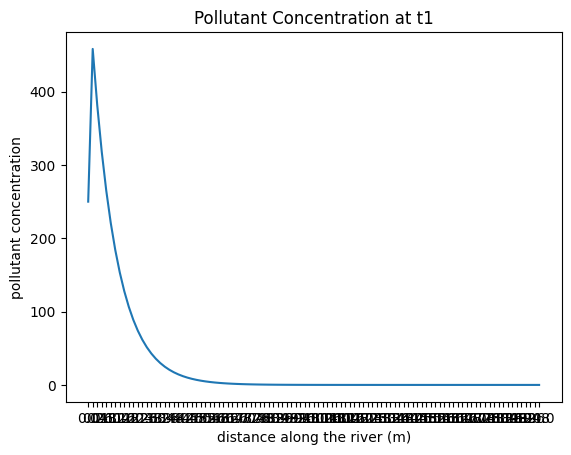

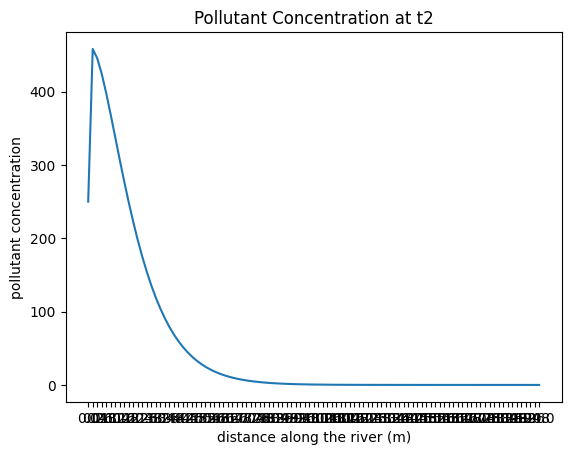

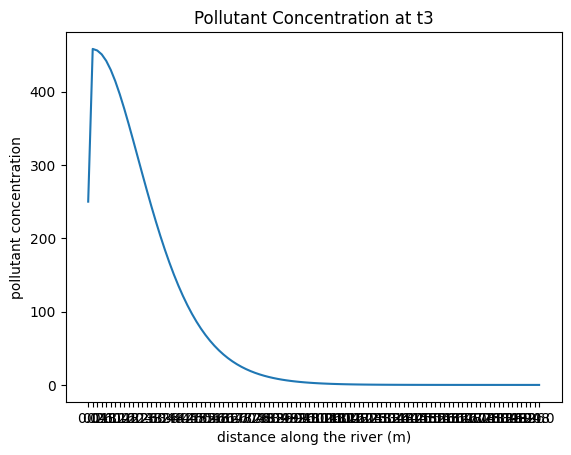

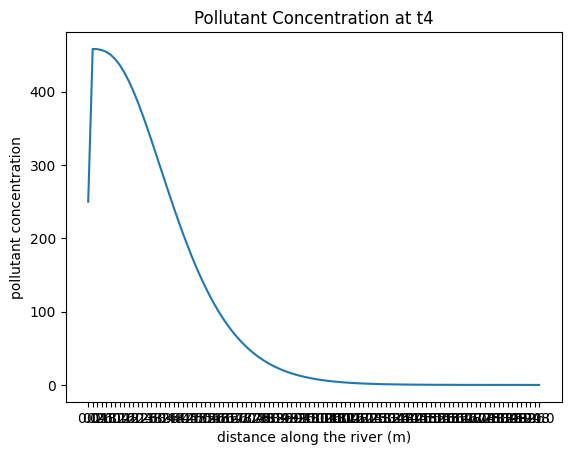

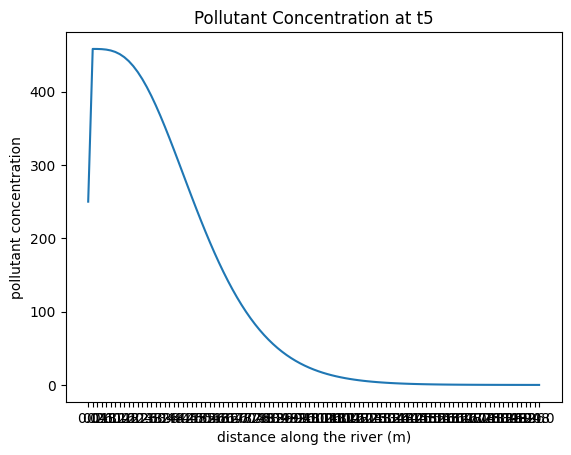

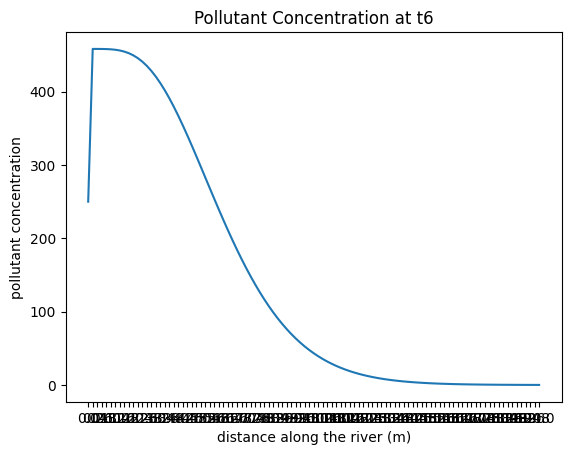

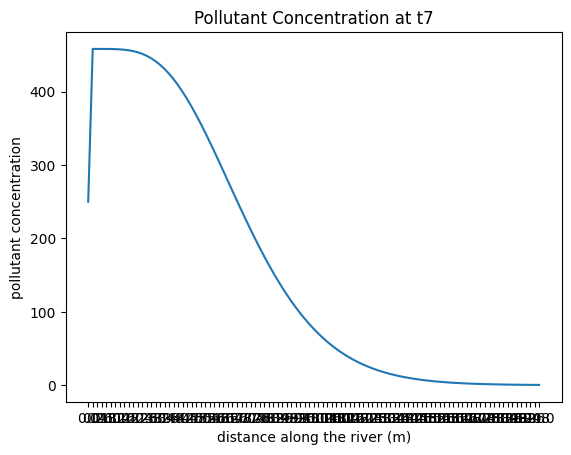

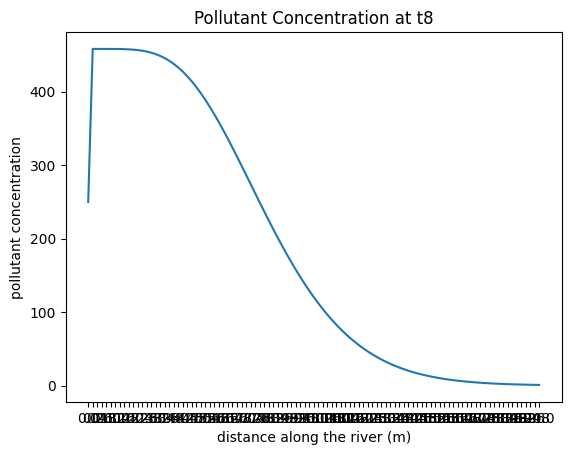

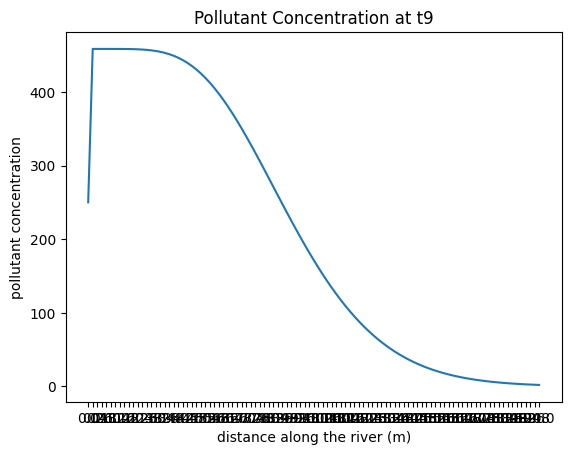

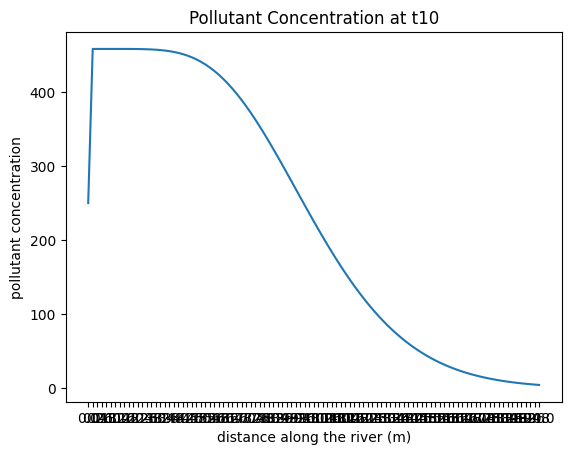

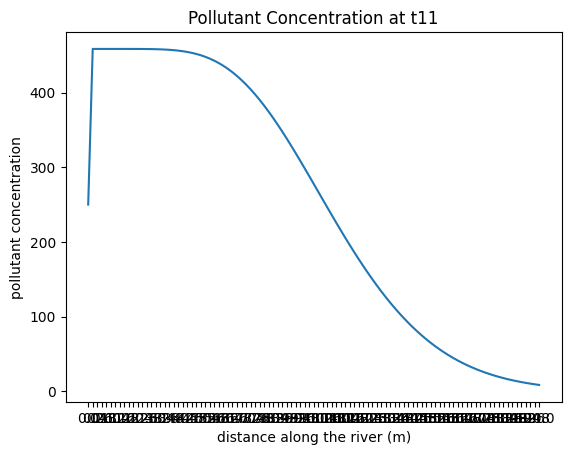

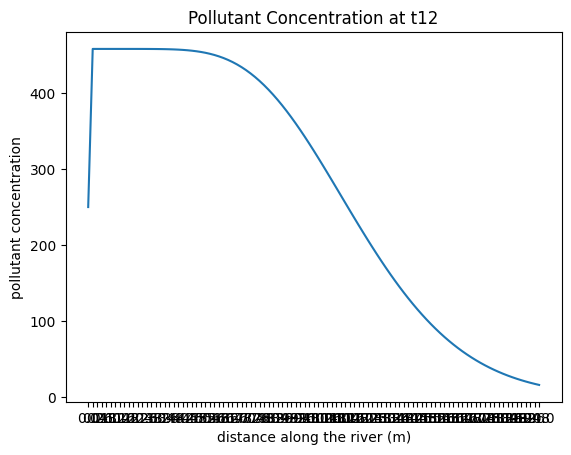

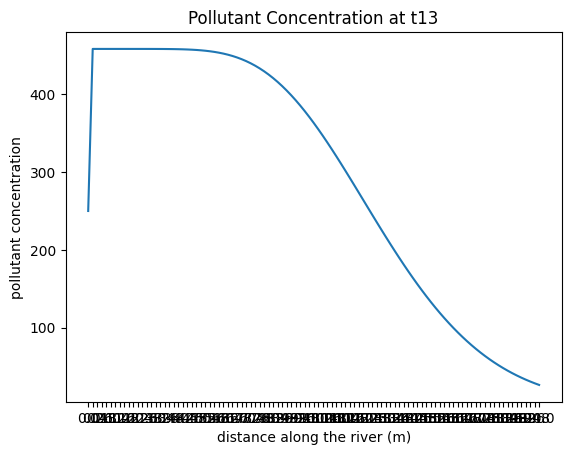

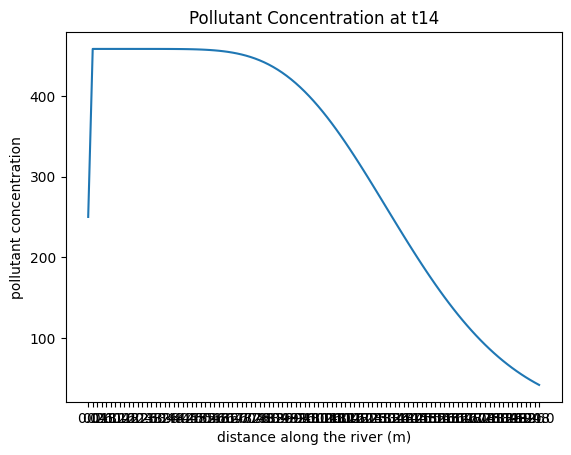

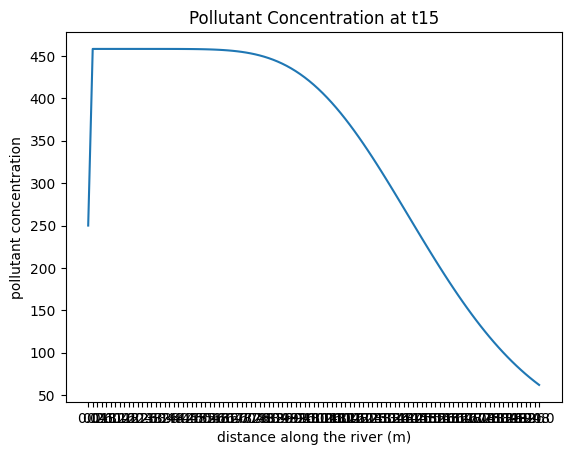

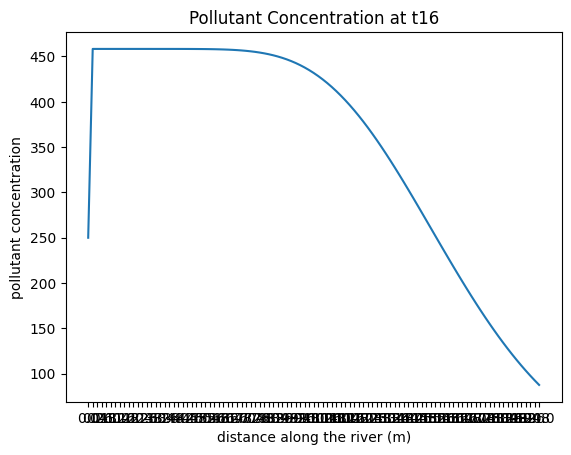

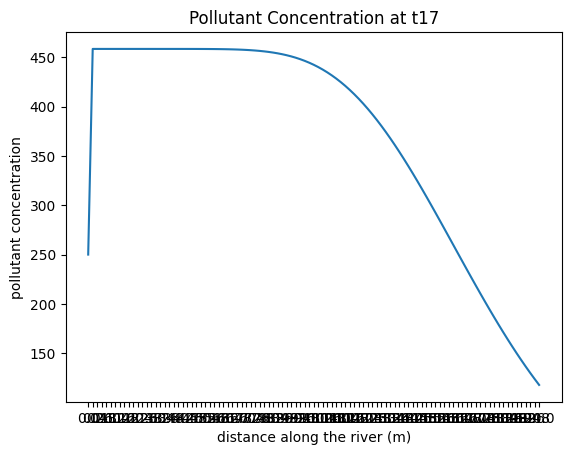

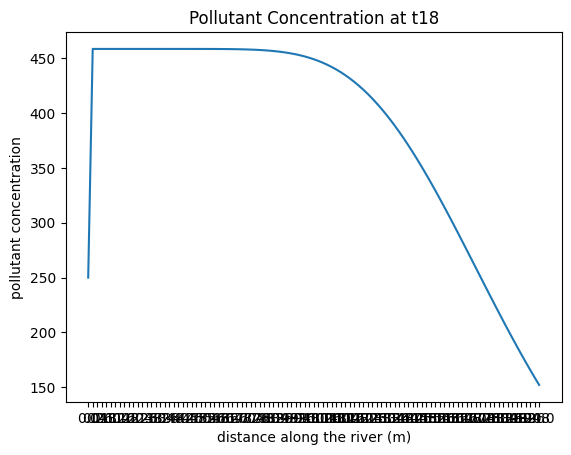

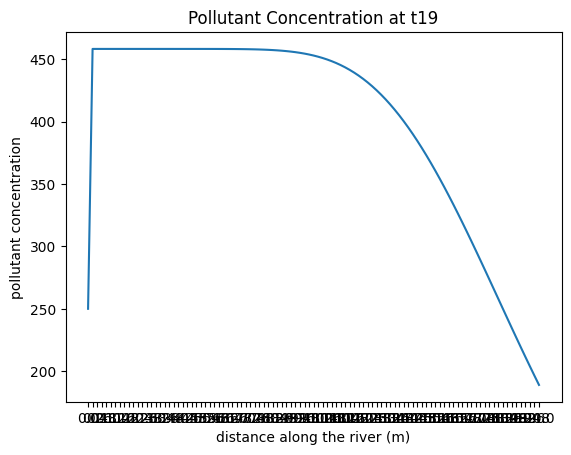

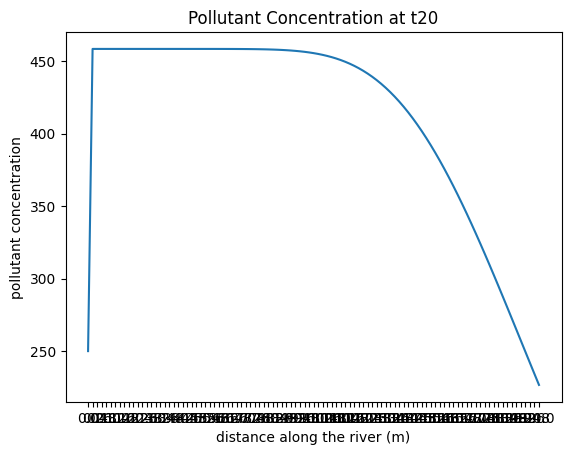

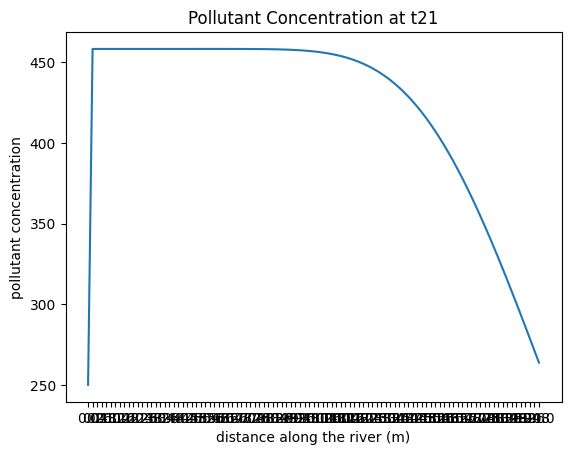

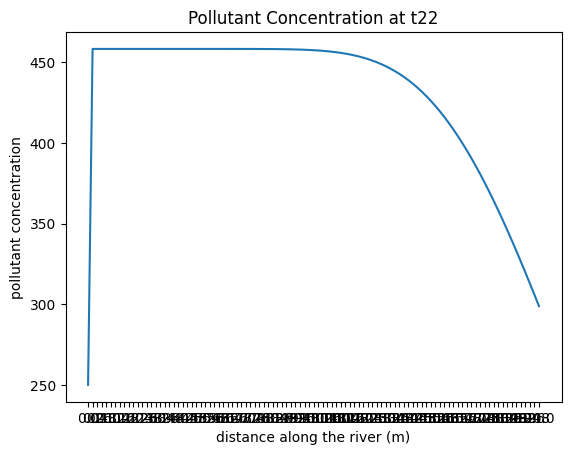

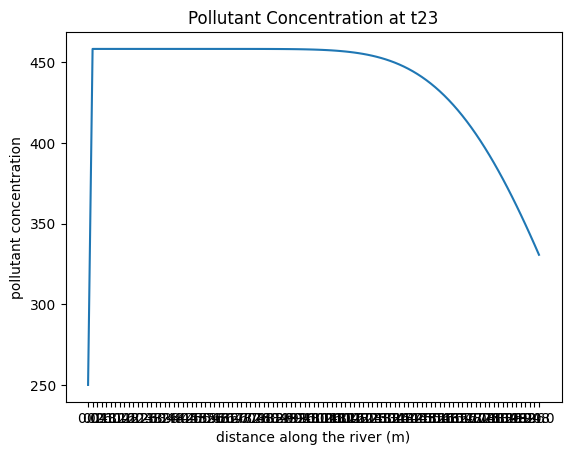

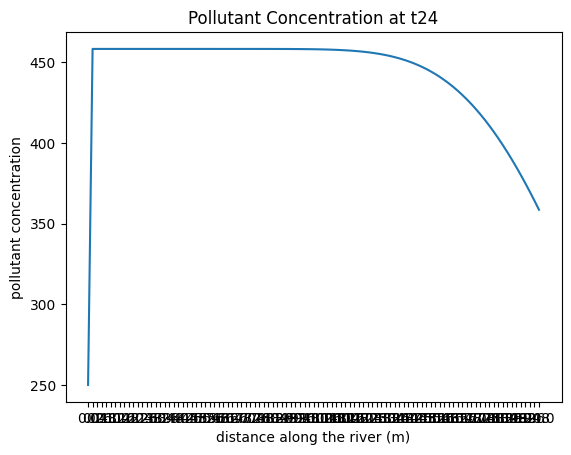

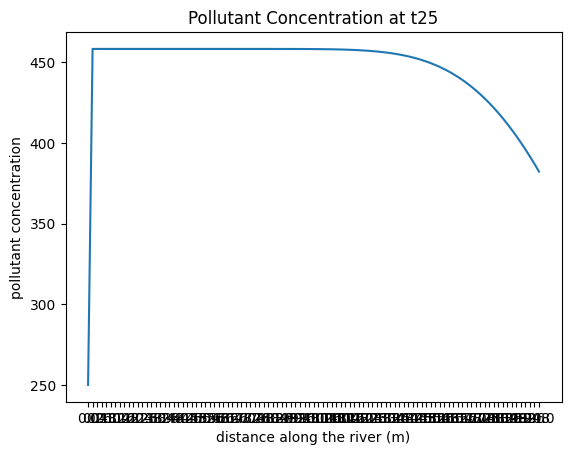

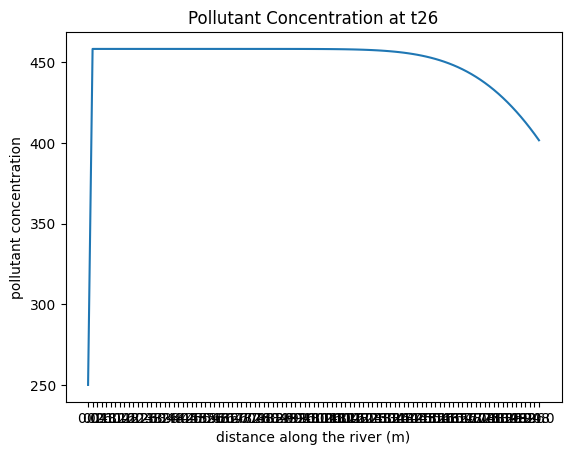

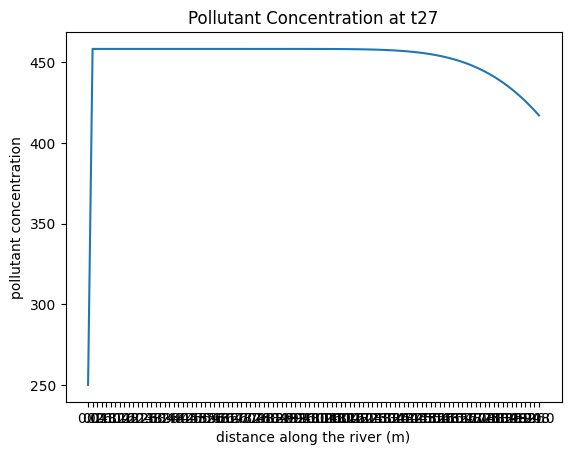

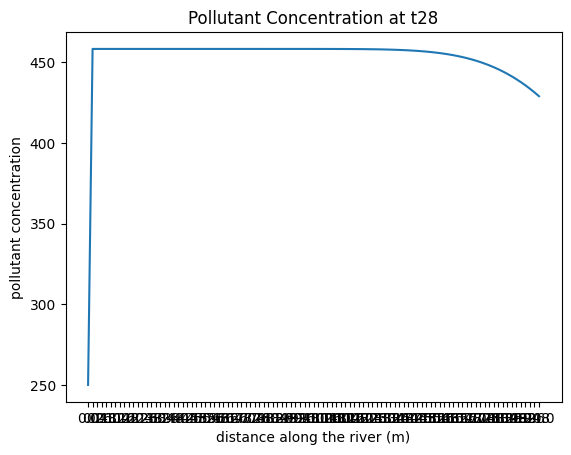

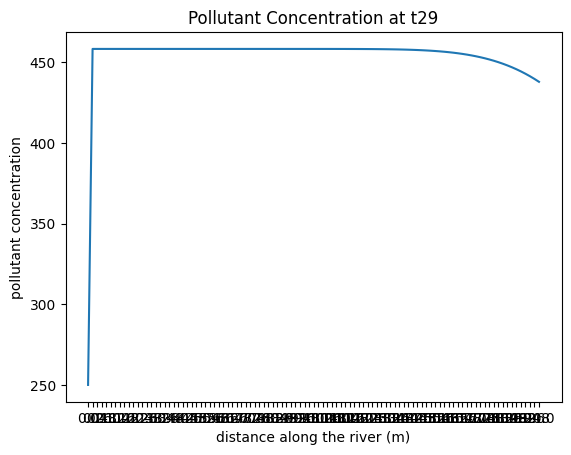

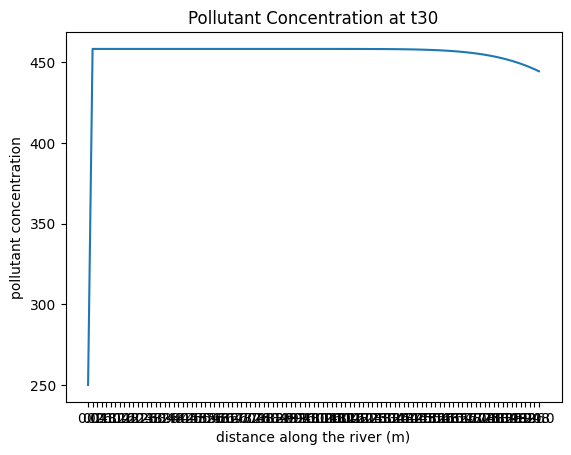

In [3]:
# Test Case 1
finite_diff(20,300,0.2,10,0.1,250)

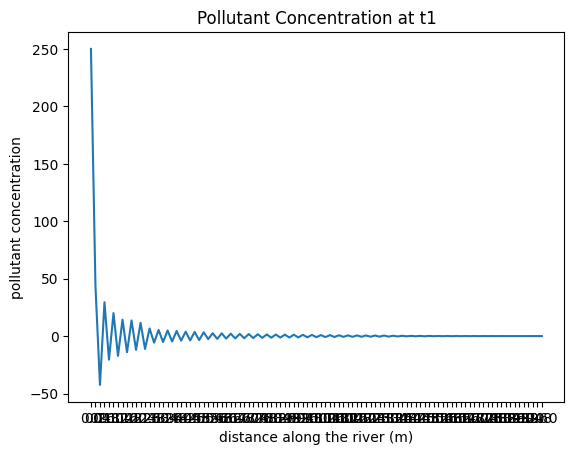

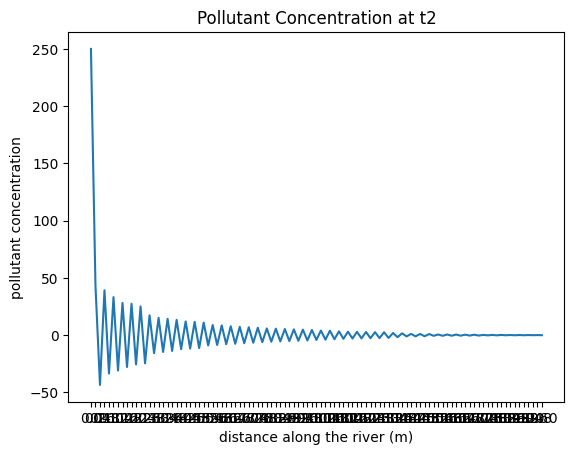

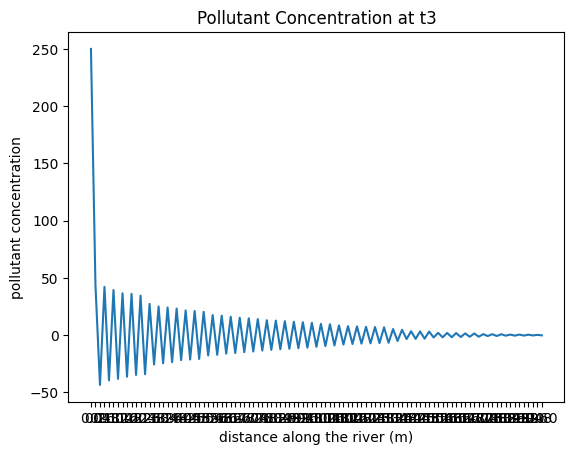

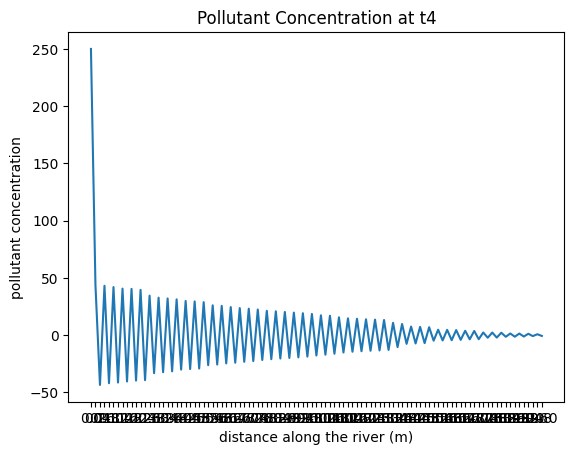

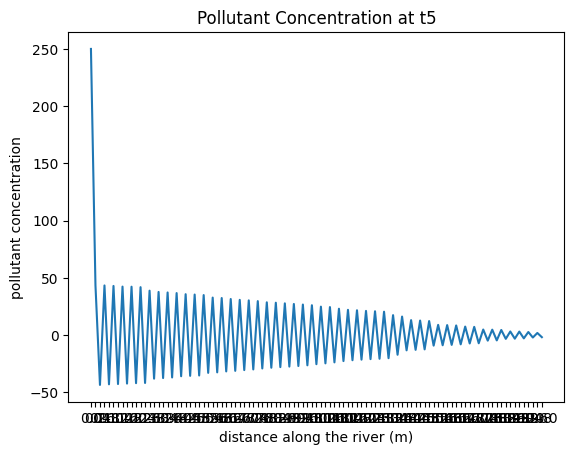

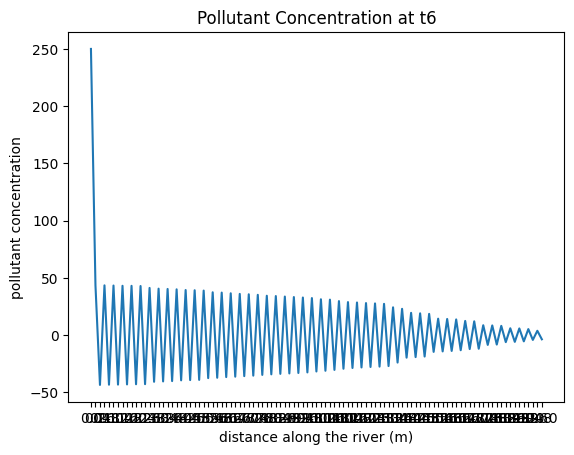

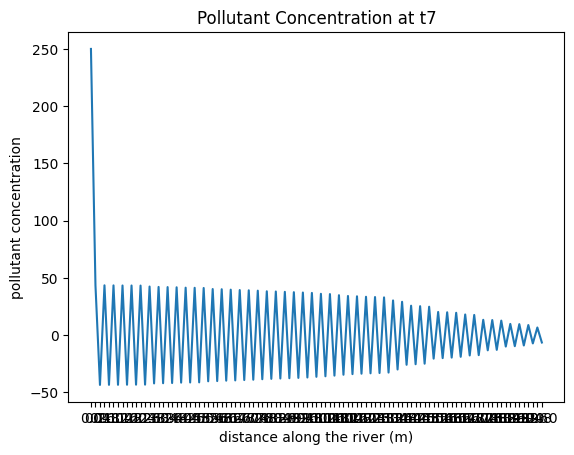

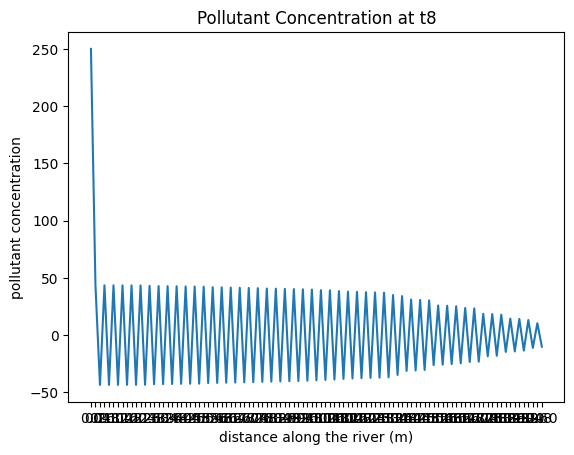

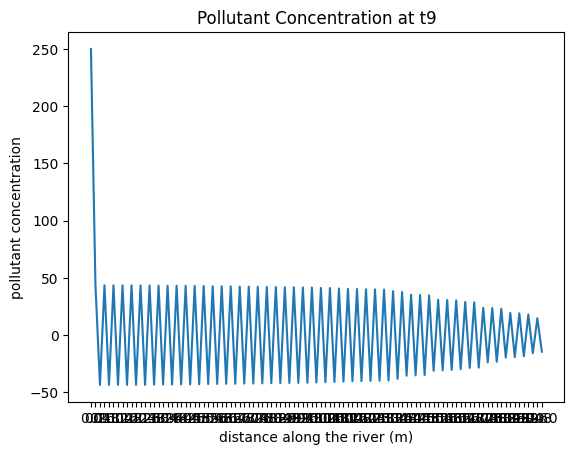

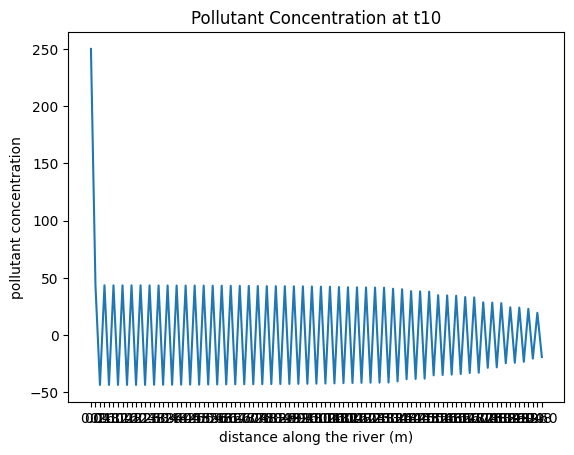

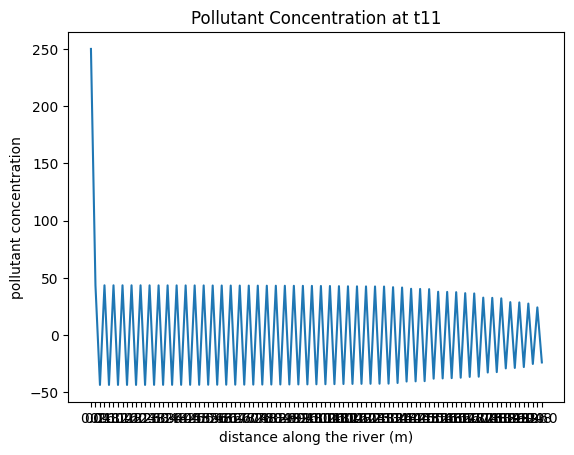

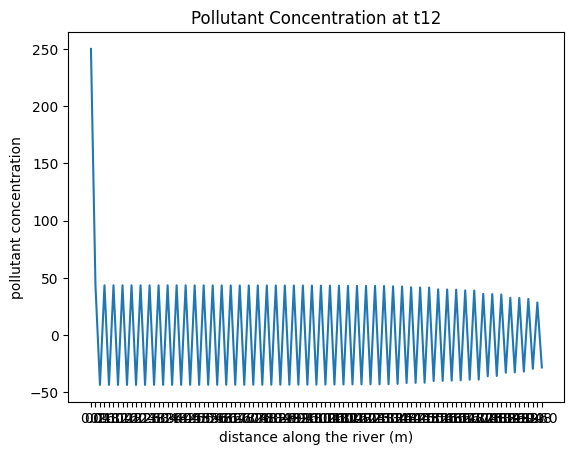

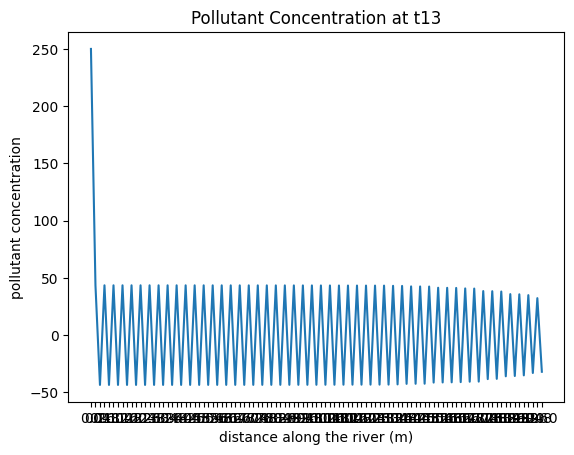

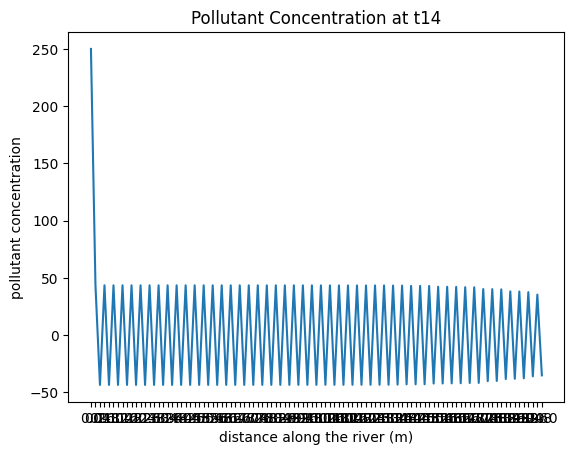

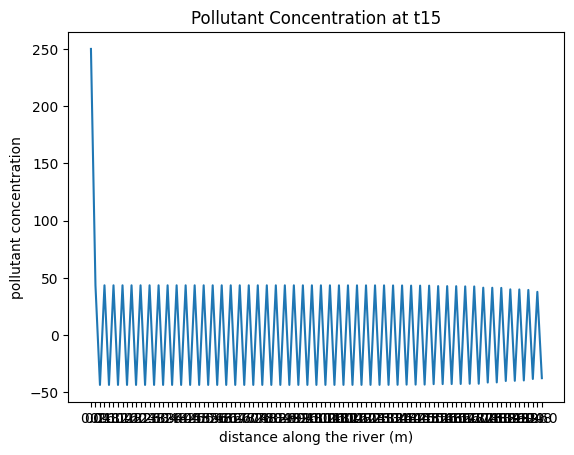

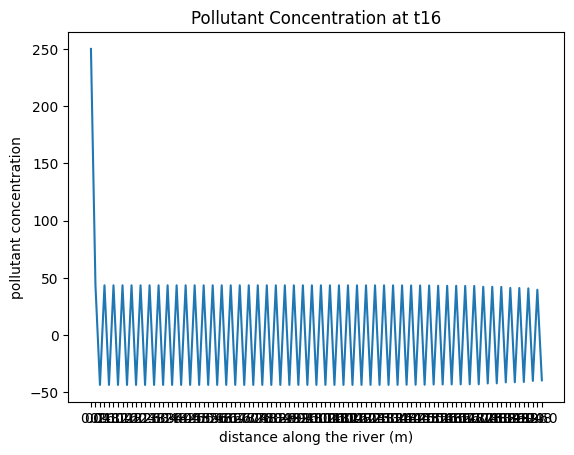

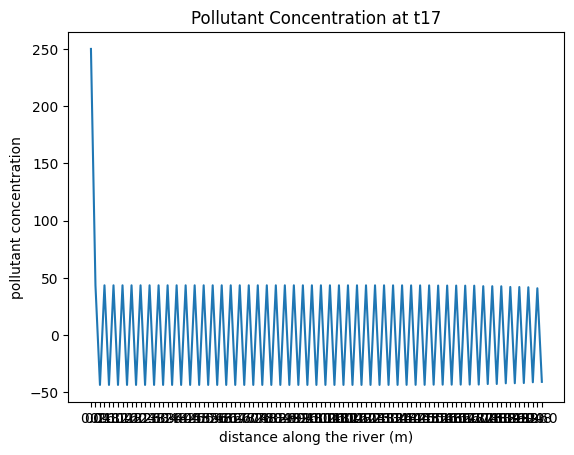

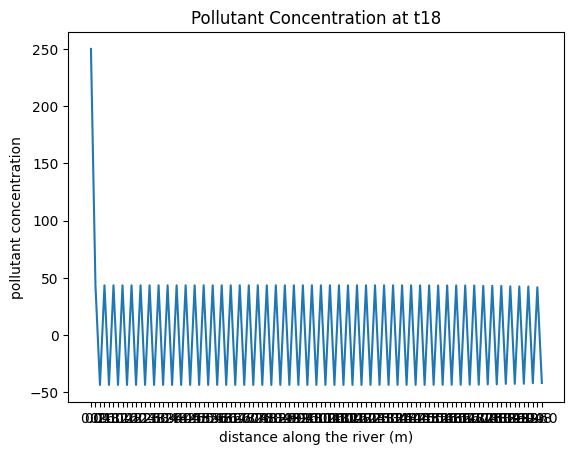

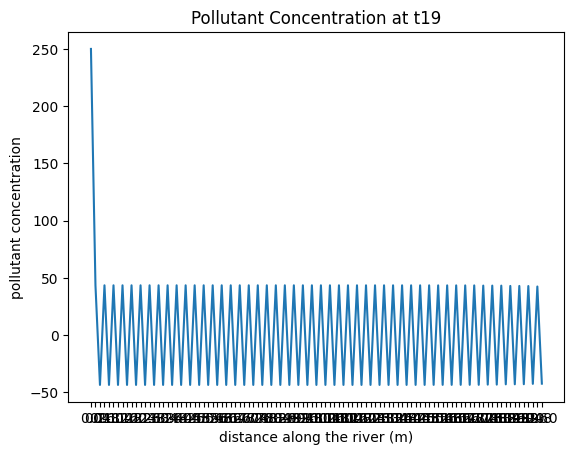

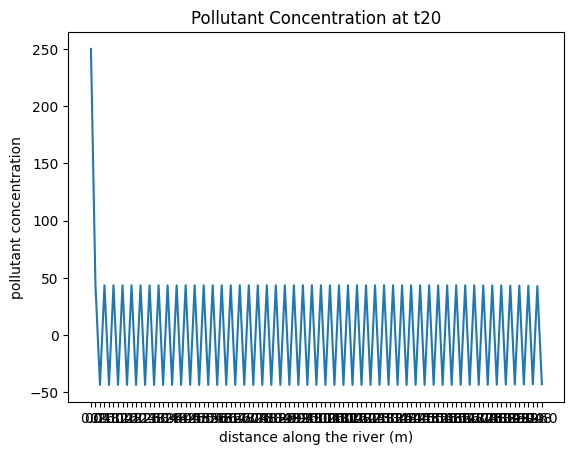

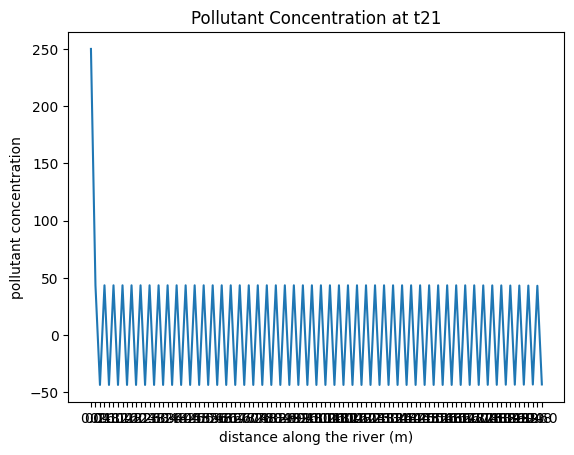

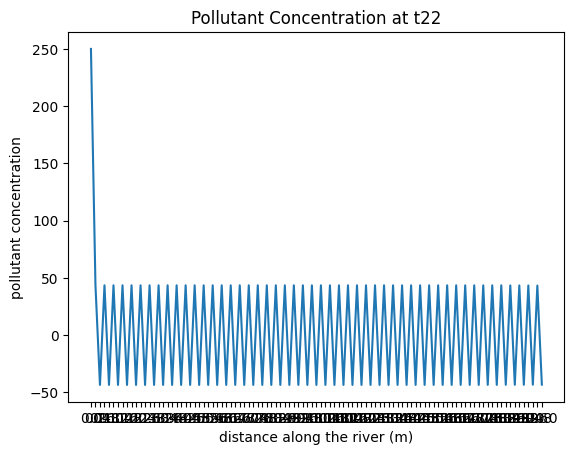

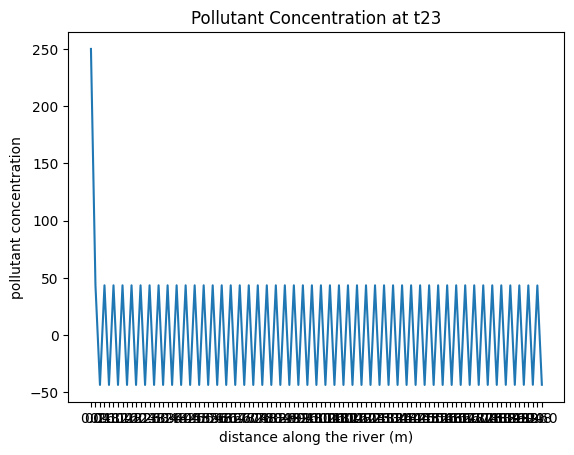

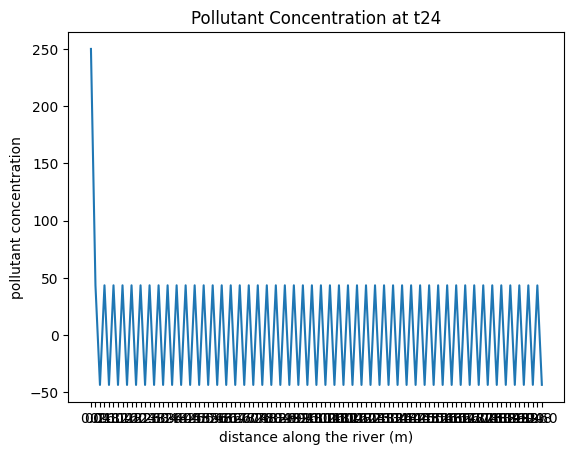

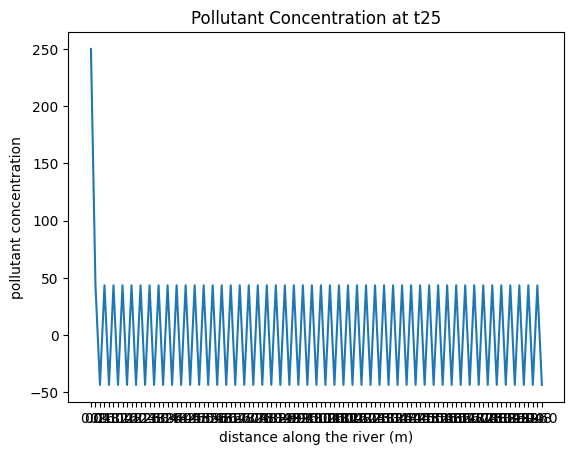

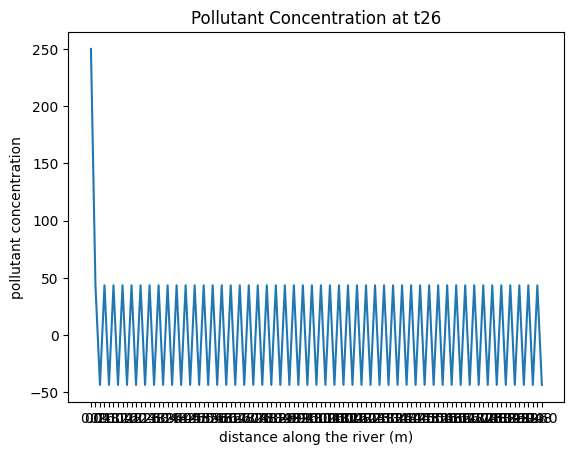

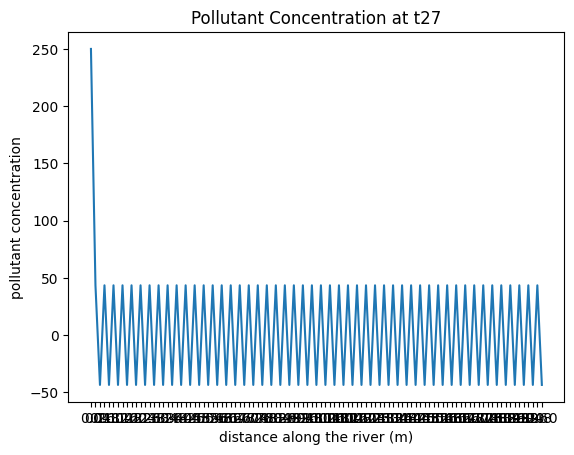

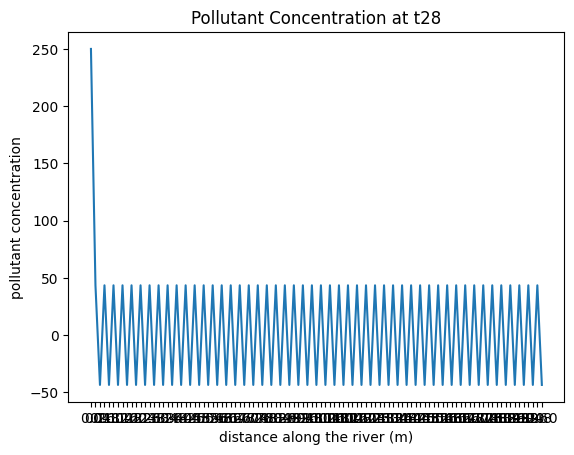

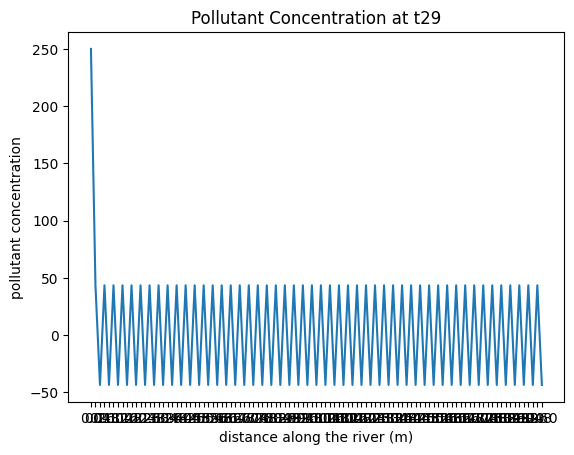

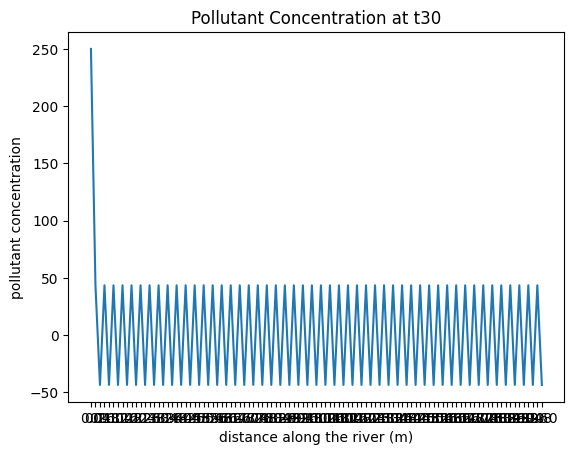

In [6]:
# Test Case 5

# generating random perturbation of velocity
u = np.random.random(100)
finite_diff(20,300,0.2,10,u,250)